In [24]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import math

In [25]:
def get_dist(X1, X2):
    N = shape(X1)[1]
    dist = 0

    for u in range(N):
        dist += abs(float(X1[0, u] - X2[0, u])) ** 2

    return sqrt(dist)

In [26]:
def mat_compare(x1, x2):
    n = shape(x1)[1]
    equal = True

    for i in range(n):
        if(x1[0, i] != x2[0, i]):
            equal = False
    return equal

In [27]:
#k均值聚类算法
#输入数据：X是输入的训练数据矩阵，每一列是一簇
#输入数据：K是要分的类数量
#返回数据：分好类的列表
def k_means(X_arr, K, iterator_counts):
    X = mat(X_arr)
    m,n = shape(X)
    miu = mat(zeros((K, n)))
    update_flag_mat = mat(zeros((1, K)))
    C = []
    cnt = 0

    #随机选取三个值作为均值向量
    miu[0, :] = X[5, :]
    miu[1, :] = X[11, :]
    miu[2, :] = X[26, :]
    lamda = mat(zeros((m, 1)))

    for i in range(K):
        C.append([[0.0, 0.0]])
    
    while(True):
        d = mat(zeros((m, K)))
        for j in range(m):
            for k in range(K):
                d[j, k] = get_dist(X[j, :], miu[k, :])
            lamda[j, 0] = argmin(d[j, :])
            mat_data = []
            for i in range(n):
                mat_data.append(float(X[j, i]))
            index = int(lamda[j, 0])
            (C[index]).append([float(X[j, 0]), float(X[j, 1])])
            if(update_flag_mat[0, index] == 0):
                update_flag_mat[0, index] = 1
                del C[index][0]
        update_flag = False
        for i in range(K):
            new_miu = mat(zeros((1, K)))
            Ci = mat(array(C[i]))   
            new_miu = mean(Ci, axis = 0)  
            if(mat_compare(new_miu, miu[i, :]) == False):
                update_flag = True
                for j in range(n):
                    miu[i, j] = new_miu[0, j]
        cnt += 1
        if(cnt >= iterator_counts):
            break
        if(update_flag == False):
            print("cnt = ", cnt)
            #break
        else:
            C.clear()
            update_flag_mat[0, :] = 0
            for i in range(K):
                C.append([[0.0, 0.0]])
    return C

In [28]:
def load_data_set(file_name):
    X = []

    fd = open(file_name)
    for line in fd.readlines():
        line_data = line.strip().split()
        X.append([float(line_data[0]), float(line_data[1])])
    return np.array(X)

In [58]:
def show_experiment_plot(C):
    length = len(C)
    color = "rygcbmk"
    dot_style = "o"
    for i in range(length):
        dot = dot_style + color[i]
        D = mat(array(C[i]))
        plt.plot(D[:, 0], D[:, 1], dot)
        
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

cnt =  2
cnt =  5


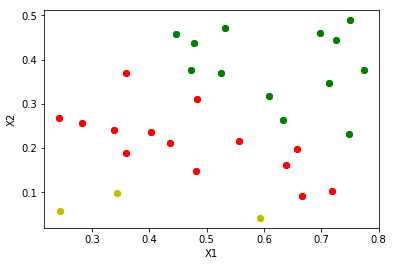

In [68]:
X = load_data_set("data_set.txt")
C = k_means(X, 3, 6)

show_experiment_plot(C)

C:\Users\77699\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars


3